# **03 - DataVisualization**

## Objectives

* Answer Business requirement 1:
  * The client is interested in conducting a study to visually differentiate a healthy cherry leaf from one with powdery mildew.

## Inputs

* inputs/cherry_leaves_dataset/cherry-leaves/train

## Outputs

* Image montages displaying samples of the original images for each label.
* Plots for avarage of images per label. 
* Plots for variability of images per label.

## Additional Comments

* No additional comments. 



---

# Import libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import joblib

from matplotlib.image import imread

---

# Set Data directory variables

## Change working directory

* Change the working directory from the current folder to /workspace/Mildew-Detection-in-Cherry-Leaves

* The output from the cell bellow should be '/workspace/Mildew-Detection-in-Cherry-Leaves'

In [2]:
os.chdir(os.path.dirname(os.getcwd()))
current_dir = os.getcwd()
current_dir

'/workspace/Mildew-Detection-in-Cherry-Leaves'

## Input directory variables

In [3]:
data_dir = 'inputs/cherry_leaves_dataset/cherry-leaves'
train_data_dir = data_dir + '/train'
val_data_dir = data_dir + '/validation'
test_data_dir = data_dir + '/test'

## Output directory variables

In [4]:
# declare the name of your output folder
output_dir = 'current_output'

In [5]:
if 'outputs' not in os.listdir(current_dir):
    os.makedirs(name='outputs')

def create_output_dir(output_dir):
    try:
        os.makedirs(name=f'outputs/{output_dir}')
        print(f'Current output folder is {output_dir} in outpsuts directory')
        return f'outputs/{output_dir}'
    except:
        print(f'Current output folder is {output_dir} in outsputs directory. Note that this is an already existing folder.')
        return f'outputs/{output_dir}'
version_output = create_output_dir(output_dir)

Current output folder is current_output in outsputs directory. Note that this is an already existing folder.


## Data label names variables

In [6]:
labels = os.listdir(train_data_dir)
print(f'Datalabels are {labels}')

Datalabels are ['healthy', 'powdery_mildew']


---

# Labels Montage

## Create an image montage with samples from each label

In [7]:
import itertools
import random
from matplotlib.image import imread

Sample data from label: healthy


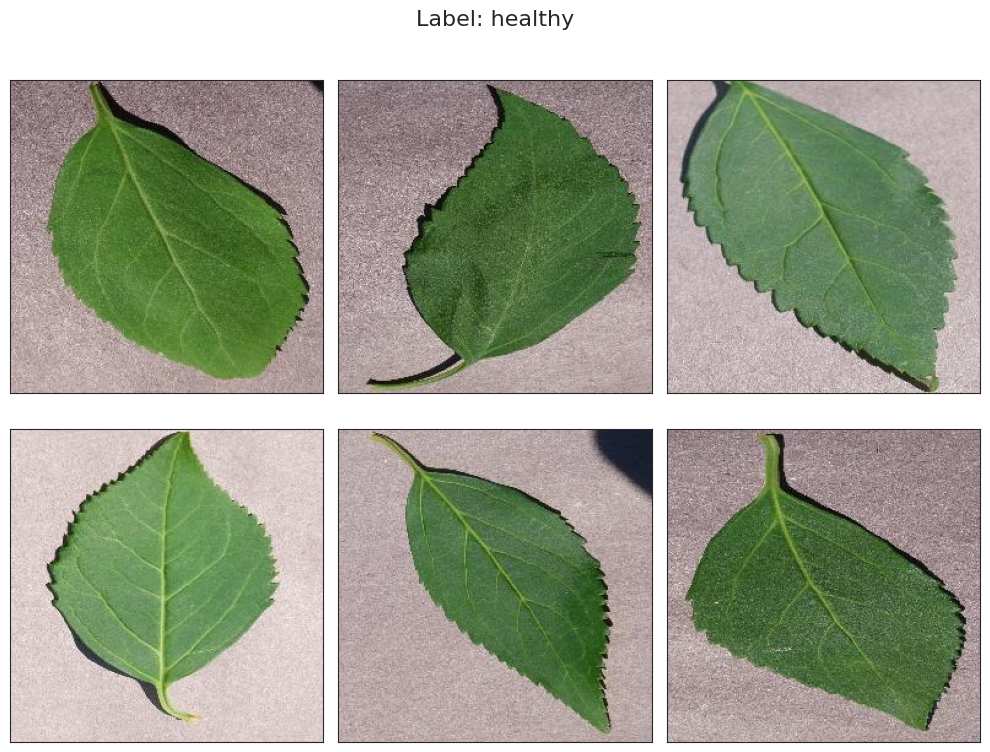

Sample data from label: powdery_mildew


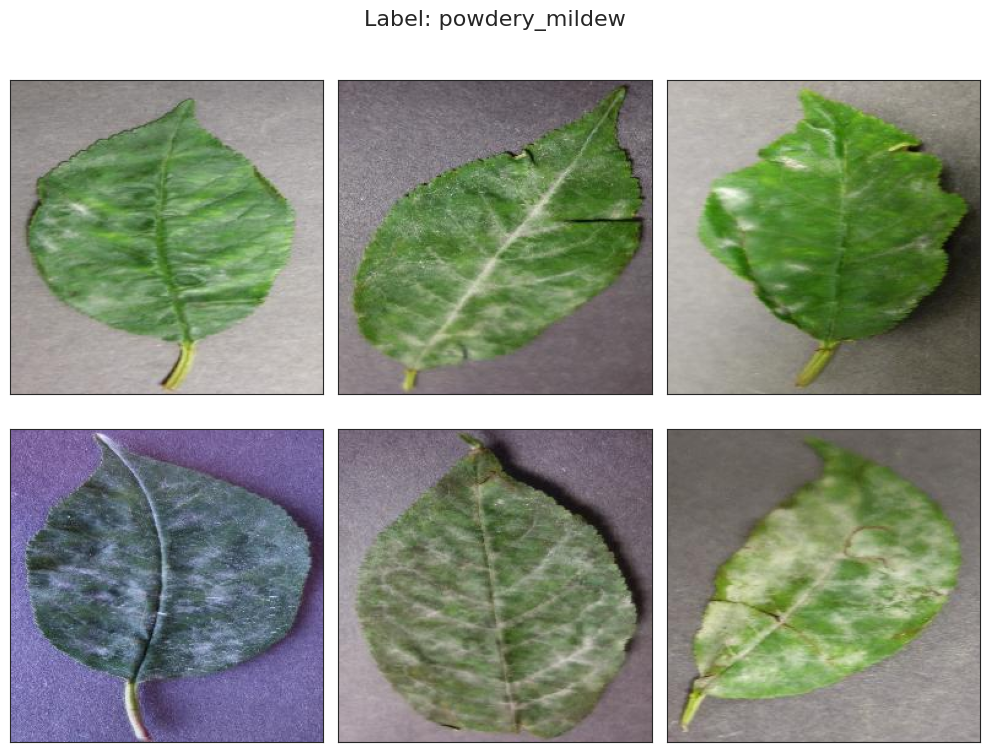

In [8]:
#Set number of rows and columns in output figure
montage_rows = 2
montage_cols = 3

#Set figure size
figsize=(10,8)

sns.set_style("white")
labels = os.listdir(train_data_dir)

for label in labels:
    print(f'Sample data from label: {label}')
    imgs_list = os.listdir(train_data_dir + '/' + label)
    imgs_sample = random.sample(imgs_list, montage_rows * montage_cols)

    # create list of axes indices based on montage_rows and montage_cols
    pos_index = []
    for i in range(0, montage_rows):
        for j in range(0, montage_cols):
            pos_index.append([i, j])

    # create a Figure and display images
    fig, axes = plt.subplots(nrows=montage_rows,ncols=montage_cols, figsize=figsize)
    fig.suptitle(f'Label: {label}', fontsize=16)
    for k in range(0, len(imgs_sample)):
        img = imread(train_data_dir + '/' + label + '/' + imgs_sample[k], 0)
        img_shape = img.shape
        axes[pos_index[k][0], pos_index[k][1]].imshow(img)
        axes[pos_index[k][0], pos_index[k][1]].set_xticks([])
        axes[pos_index[k][0], pos_index[k][1]].set_yticks([])
    plt.tight_layout()
    plt.savefig(fname=version_output+f'/img_montage_{label}')
    plt.show()
    

---

# Image Avarage and Variability

* Draw a random sample subset from both "healthy" and "powder_mildew" labels and store as numpy arrays

In [9]:
from tensorflow.keras.preprocessing import image
import numpy as np

#number of images to include in calculating the avarage and variability
images_amount = 100

image_array, label_array = np.array([], dtype='int'), np.array([], dtype='object')

for label in labels:
    imgs_list = os.listdir(train_data_dir + '/' + label)
    imgs_sample = random.sample(imgs_list, images_amount)
    for image_sample in imgs_sample:
        img = image.load_img(train_data_dir + '/' + label + '/' + image_sample)
        if image.img_to_array(img).max() > 1: 
            img_norm = image.img_to_array(img) / 255
        else: 
            img_norm = image.img_to_array(img)
            
        image_array = np.append(image_array, img_norm).reshape(-1, img_norm.shape[0], img_norm.shape[1], img_norm.shape[2])
        label_array = np.append(label_array, label)

* Calculate avarage image and image variability from sample.
* Create an image montage for each label (healthy and powdery mildew)

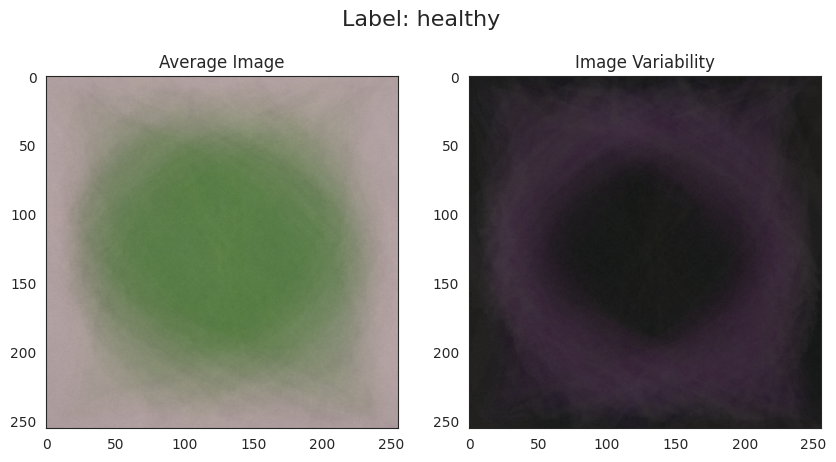

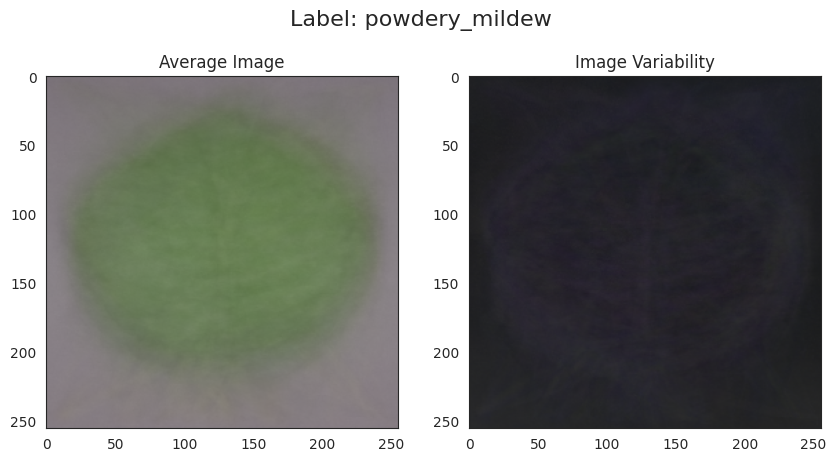

In [10]:
#Set figure size
figsize=(10,5)

#store image avgs for comparisson
img_avgs = []
for label in labels:

    label_array = label_array.reshape(-1,1,1)
    boolean_mask = np.any(label_array==label,axis=1).reshape(-1)
    sample_array = image_array[boolean_mask]

    #Calculate avarage
    avg_img = np.mean(sample_array, axis = 0)
    img_avgs.append(avg_img)

    #Calculate variability
    std_img = np.std(sample_array, axis = 0)

    #Create plot
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    fig.suptitle(f'Label: {label}', fontsize=16)
    axes[0].set_title(f"Average Image")
    axes[0].imshow(avg_img, cmap='gray')
    axes[1].set_title(f"Image Variability")
    axes[1].imshow(std_img, cmap='gray')
    plt.savefig(fname=version_output+f'/img_avg_and_varblty_{label}')
    plt.show()
    print("\n")


---

# Label Avarage Differentiation

* Calculate and plot difference of avarage for label "healthy" and "powdery mildew"

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


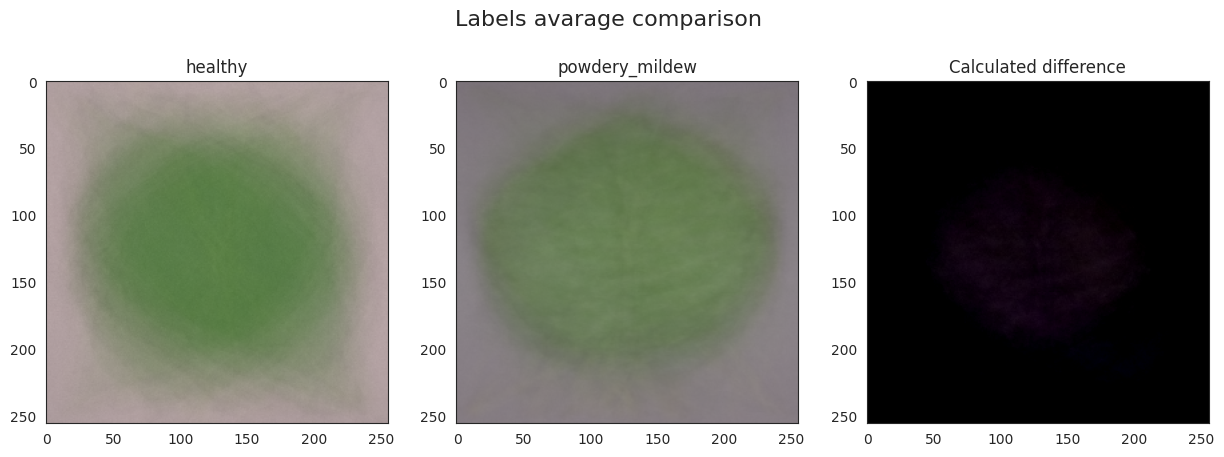

In [11]:
#set size of figure
figsize = (15,5)

#Calculate difference between avarages
contrast_mean = img_avgs[1] - img_avgs[0]

#Create figure with plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=figsize)
fig.suptitle(f'Labels avarage comparison', fontsize=16)
axes[0].imshow(img_avgs[0], cmap='gray')
axes[0].set_title(f'{labels[0]}')
axes[1].imshow(img_avgs[1], cmap='gray')
axes[1].set_title(f'{labels[1]}')
axes[2].imshow(contrast_mean, cmap='gray')
axes[2].set_title(f'Calculated difference')
plt.savefig(fname=version_output+f'/diff_in_label_img_avg')
plt.show()

---

# Conclusions and Next Steps

* Studying the differences in Avarage and Variability of images from each label does not give a clear indication of visual differences.
* The best indication of visual differences is the image montage displaying samples from each class where one might intuitively notice the differences like the noticable white powdery surface changes as well as creased and damaged corners on the leaves infected with powdery mildew.
* One can also notice a slight difference between the avarages of each class when they are plotted next to each other, but in the actuall "Calculated difference"-plot it is barely noticable. 